<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EXPLORATORY/regresion_univariada_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos univariados de regresión $y = f(x)$


## Ejemplo simple regresión lineal:


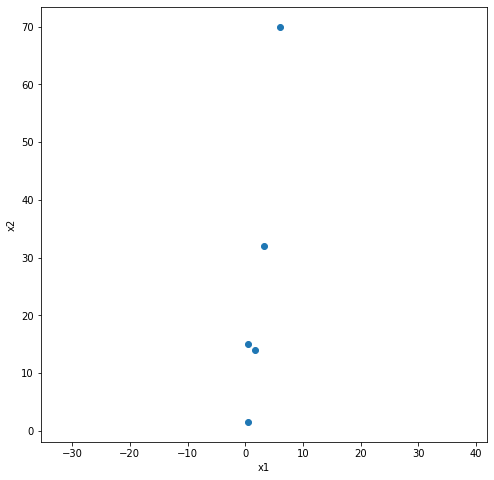

In [3]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1.6,14],[3.2,32],[6,70],[0.5,1.5],[0.5,15]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

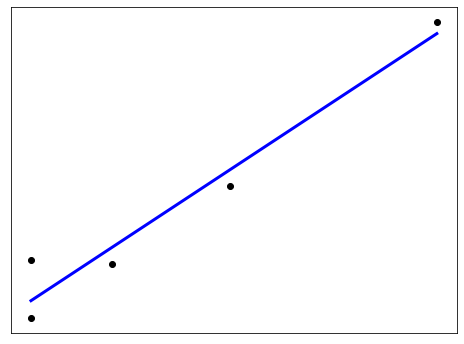

In [87]:
x = D[:,0].reshape(-1, 1)
y = D[:,1].reshape(-1, 1)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(x, y)

# Model predictions:
x_pred = np.linspace(x.min(),x.max(),10).reshape(-1, 1)
y_pred = regr.predict(x_pred)


# Plot figure:
fig = plt.figure(figsize=(8,6))
plt.scatter(x, y,  color='black')
plt.plot(x_pred, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()



In [86]:
y_pred.shape

(10, 1)

Coeficientes e índices de ajuste:

In [44]:
# The coefficients:
print('Pendiente a = {}'.format(regr.coef_))
print('Intersección b = {}'.format(regr.intercept_))

# Performance indexes:
print('Mean squared error = {}'.format(mean_squared_error(y, y_pred)))
print('Coefficient of determination R2 = {}'.format(r2_score(y, y_pred)))

Pendiente a = [[11.21805274]]
Intersección b = 0.0
Mean squared error = 28.621186612576064
Coefficient of determination R2 = 0.9495395158452468


Utilizando las librerías statsmodels tenemos más opciones:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     56.46
Date:                Mon, 27 Apr 2020   Prob (F-statistic):            0.00489
Time:                        16:11:59   Log-Likelihood:                -15.480
No. Observations:                   5   AIC:                             34.96
Df Residuals:                       3   BIC:                             34.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0584      4.682      0.012      0.9

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


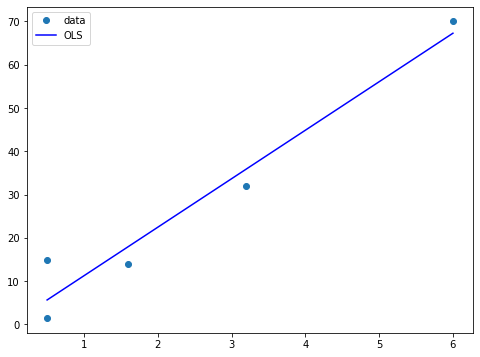

In [108]:
import statsmodels.api as sm
x = D[:,0]
y = D[:,1]

X = sm.add_constant(x) # adds a first column to add an intercept (beta_0) to our model
model = sm.OLS(y, X)
model = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

# Model predictions:
x_pred = np.linspace(x.min(),x.max(),10)
X_pred = sm.add_constant(x_pred) # adds a first column to add an intercept (beta_0) to our model

y_pred = model.predict(X_pred)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x_pred, y_pred, 'b-', label="OLS")
ax.legend(loc='best');

## Selección de modelos de regresión (AIC index):

Comparamos tres modelos de regresión:

- Modelo 1 (Lineal): $y = a x + b$
- Modelo 2 (Cuadrático): $y = a x^2 + b x + c$
- Modelo 2 (Orden 3):  $y = a x^3 + b x^3 + c x + d$

Model 1 AIC:  34.959862570077306
Model 2 AIC:  34.90473781251703
Model 3 AIC:  36.703356721520336


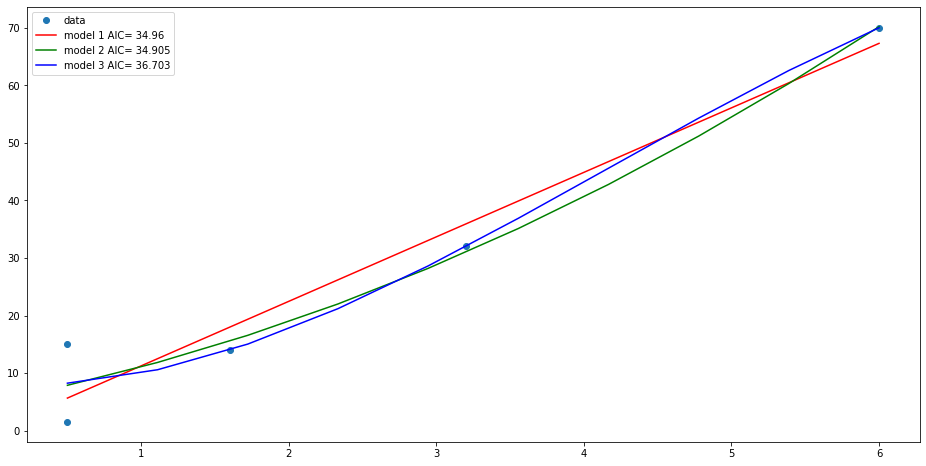

In [127]:
x = D[:,0]
y = D[:,1]

# Modelo 1 (Lineal): y = a*x + b
model1 = sm.OLS(y, X)
model1 = model1.fit()

# Modelo 2 (Cuadrático): y = a*x^2 + b*x + c
X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
model2 = model2.fit()

# Modelo 2 (Orden 3):  y = a*x^3 + b*x^3 + c*x + d
X3 = np.column_stack((x, x**2, x**3))
X3 = sm.add_constant(X3) # adds a first column with ones
model3 = sm.OLS(y, X3)
model3 = model3.fit()

print('Model 1 AIC: ',results1.aic)
print('Model 2 AIC: ',results2.aic)
print('Model 3 AIC: ',results3.aic)

x_predict = np.linspace(x.min(),x.max(),10)
X_pred = sm.add_constant(x_predict) # adds a first column to add an intercept (beta_0) to our model
X2_pred = np.column_stack((x_predict, x_predict**2))
X2_pred = sm.add_constant(X2_pred) # adds a first column to add an intercept (beta_0) to our model
X3_pred = np.column_stack((x_predict, x_predict**2,x_predict**3))
X3_pred = sm.add_constant(X3_pred) # adds a first column to add an intercept (beta_0) to our model

y1_predict = model1.predict(X_pred)
y2_predict = model2.predict(X2_pred)
y3_predict = model3.predict(X3_pred)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, y, 'o', label="data")
ax.plot(x_predict, y1_predict, 'r-', label="model 1 AIC= {:.5}".format(model1.aic))
ax.plot(x_predict, y2_predict, 'g-', label="model 2 AIC= {:.5}".format(model2.aic))
ax.plot(x_predict, y3_predict, 'b-', label="model 3 AIC= {:.5}".format(model3.aic))
ax.legend()
plt.show()

In [125]:
X2.shape

(5, 3)

(10, 1)

## Ejemplo: Regresión de variables en mcars:

In [49]:
import pandas as pd 
import seaborn as sns 
mpg = sns.load_dataset("mpg")
mpg_num = mpg.select_dtypes(include='number') # keep only numeric variables 
mpg_num_nonans = mpg_num.dropna() # remove observations with NaNs

print('datos originales = {}'.format(mpg.shape))
print('datos numericos = {}'.format(mpg_num.shape))
print('datos numericos sin NaNs = {}'.format(mpg_num_nonans.shape))

datos originales = (398, 9)
datos numericos = (398, 7)
datos numericos sin NaNs = (392, 7)


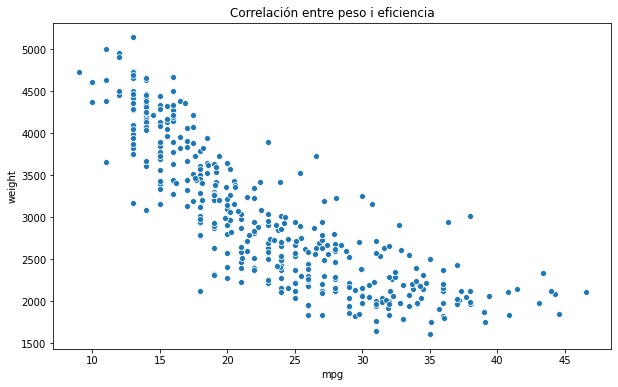

In [50]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="mpg", y="weight", data=mpg)
ax.set_title('Correlación entre peso i eficiencia')
plt.show()

Model 1 AIC:  34.959862570077306
Model 2 AIC:  34.90473781251703
Model 3 AIC:  36.703356721520336


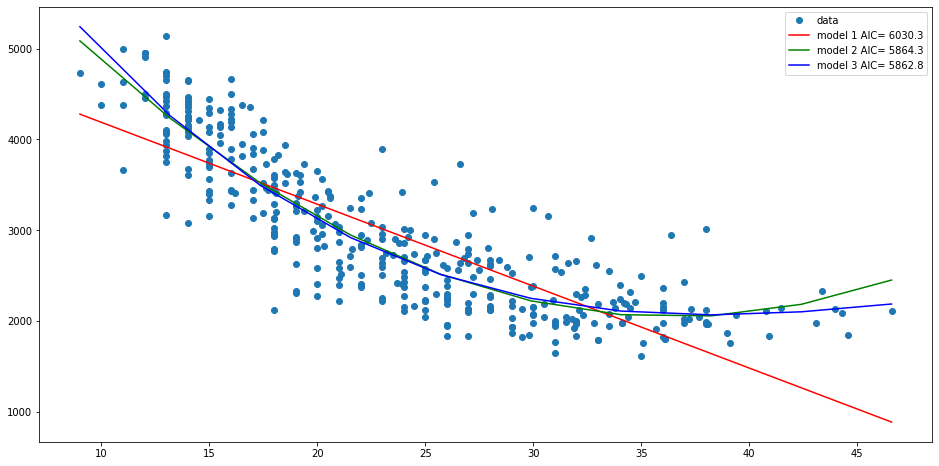

In [128]:
x = mpg['mpg']
y = mpg['weight']
X = sm.add_constant(x) # adds a first column to add an intercept (beta_0) to our model


# Modelo 1 (Lineal): y = a*x + b
model1 = sm.OLS(y, X)
model1 = model1.fit()

# Modelo 2 (Cuadrático): y = a*x^2 + b*x + c
X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
model2 = model2.fit()

# Modelo 2 (Orden 3):  y = a*x^3 + b*x^3 + c*x + d
X3 = np.column_stack((x, x**2, x**3))
X3 = sm.add_constant(X3) # adds a first column with ones
model3 = sm.OLS(y, X3)
model3 = model3.fit()

print('Model 1 AIC: ',results1.aic)
print('Model 2 AIC: ',results2.aic)
print('Model 3 AIC: ',results3.aic)

x_predict = np.linspace(x.min(),x.max(),10)
X_pred = sm.add_constant(x_predict) # adds a first column to add an intercept (beta_0) to our model
X2_pred = np.column_stack((x_predict, x_predict**2))
X2_pred = sm.add_constant(X2_pred) # adds a first column to add an intercept (beta_0) to our model
X3_pred = np.column_stack((x_predict, x_predict**2,x_predict**3))
X3_pred = sm.add_constant(X3_pred) # adds a first column to add an intercept (beta_0) to our model

y1_predict = model1.predict(X_pred)
y2_predict = model2.predict(X2_pred)
y3_predict = model3.predict(X3_pred)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, y, 'o', label="data")
ax.plot(x_predict, y1_predict, 'r-', label="model 1 AIC= {:.5}".format(model1.aic))
ax.plot(x_predict, y2_predict, 'g-', label="model 2 AIC= {:.5}".format(model2.aic))
ax.plot(x_predict, y3_predict, 'b-', label="model 3 AIC= {:.5}".format(model3.aic))
ax.legend()
plt.show()